# Análisis de Conglomerados Jerárquicos

- [Lab 2: K-Means Clustering](#Lab-2:-Clustering)
- [Lab 2: Hierarchical Clustering](#10.5.3-Hierarchical-Clustering)
- [Lab 3: NCI60 Data Example](#Lab-3:-NCI60-Data-Example)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## Lab 2: Conglomerados

### 10.5.1 K-Means Agrupaciones de K-Medias

In [2]:
# Ejemplo con datos aleatorios
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

#### K = 2

In [3]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [4]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

Vea el gráfico para K=2 abajo.

####  K = 3

In [5]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [6]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [7]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [8]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2])

In [9]:
# Suma de las distancias de las muestras a su centroide más cercano
km2.inertia_

68.97379200939724

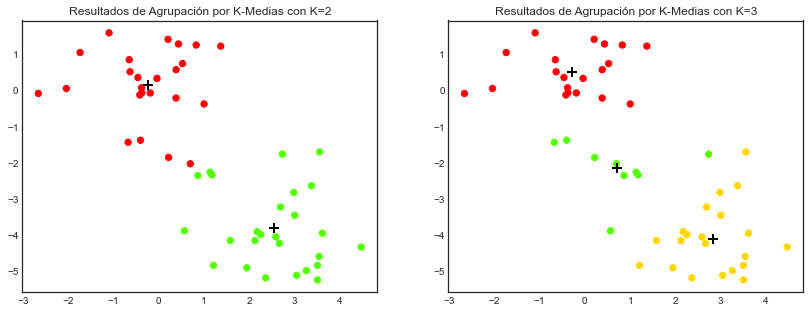

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('Resultados de Agrupación por K-Medias con K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('Resultados de Agrupación por K-Medias con K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 10.5.3 Conglomerados Jerárquicos

#### scipy

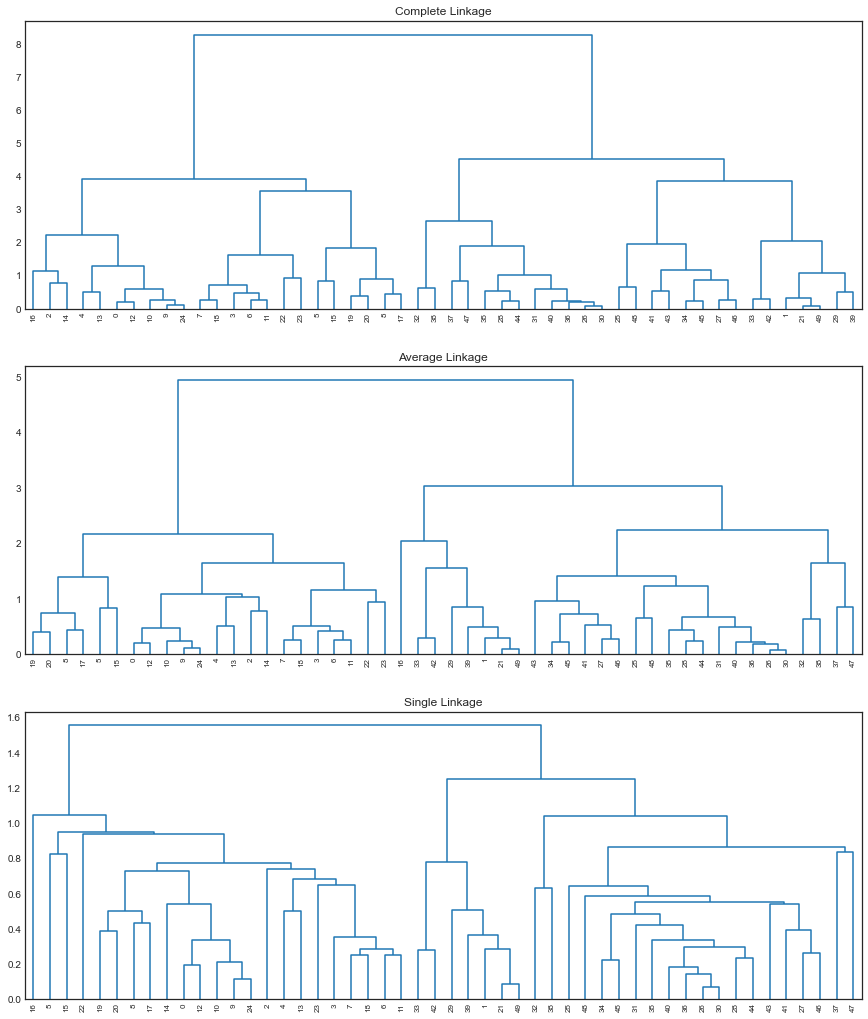

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

## Ejemplo con datos del Senado de Delitos en la República Mexicana por Estado en el año 2017
### Carga de datos

In [12]:

# Carga de datos
df = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque 1 Instalacion y tipos de variables/datosSenado/IDEFC_jun2021.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        44352 non-null  int64 
 1   INEGI       44352 non-null  int64 
 2   ENTIDAD     44352 non-null  object
 3   MODALIDAD   44352 non-null  object
 4   TIPO        44352 non-null  object
 5   SUBTIPO     44352 non-null  object
 6   ENERO       44352 non-null  int64 
 7   FEBRERO     44352 non-null  int64 
 8   MARZO       44352 non-null  int64 
 9   ABRIL       44352 non-null  int64 
 10  MAYO        44352 non-null  int64 
 11  JUNIO       44352 non-null  int64 
 12  JULIO       44352 non-null  int64 
 13  AGOSTO      44352 non-null  int64 
 14  SEPTIEMBRE  44352 non-null  int64 
 15  OCTUBRE     44352 non-null  int64 
 16  NOVIEMBRE   44352 non-null  int64 
 17  DICIEMBRE   44352 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 6.1+ MB


In [13]:
df2=df.loc[df['YEAR']==2017]
df2=df2.copy()
df2.drop(['YEAR','INEGI'],axis='columns', inplace=True)
df3=df2.groupby(['ENTIDAD','MODALIDAD']).sum()

In [14]:
df3.index = df3.index.set_names(['ENTIDAD','MODALIDAD'])
df3.reset_index(inplace=True)
df3 = df3.reset_index()
df4=pd.melt(df3, id_vars=['ENTIDAD','MODALIDAD'], value_vars=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
                                                          'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
                                                          'DICIEMBRE'])
df4.drop('variable',axis='columns', inplace=True)
df5=df4.groupby(['ENTIDAD','MODALIDAD']).sum()
df5.index = df5.index.set_names(['ENTIDAD','MODALIDAD'])
df5.reset_index(inplace=True)
df6=df5.sort_values(by=['ENTIDAD']).pivot(index='ENTIDAD',columns='MODALIDAD',values='value')

In [15]:
#Escalamiento
X= pd.DataFrame(scale(df6), index=df6.index, columns=df6.columns)

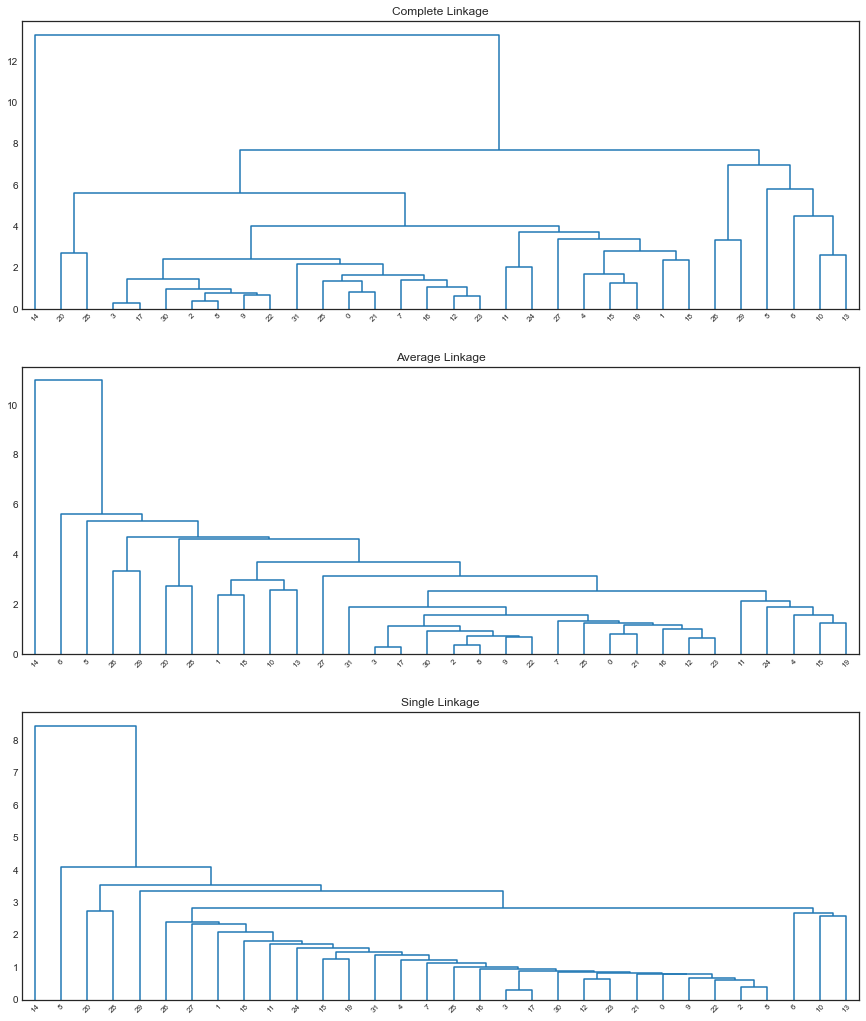

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

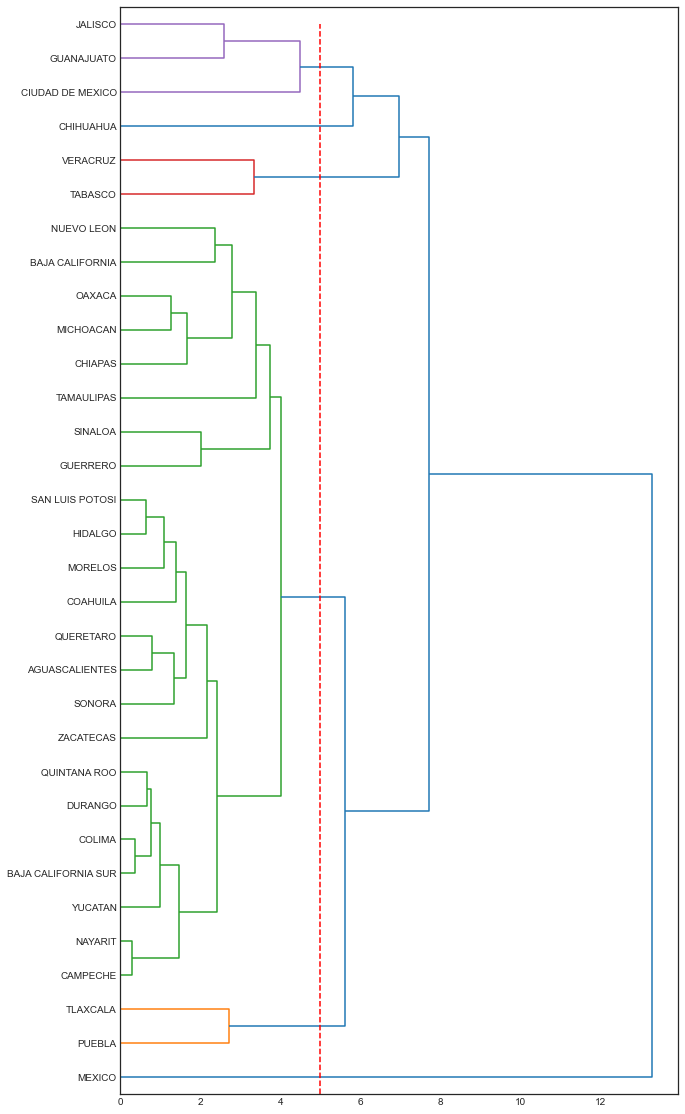

In [42]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index, orientation='right', color_threshold=5, leaf_font_size=10)
#Traza la línea horizontal roja en el umbral de 5 (color_threshold)
plt.vlines(5,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

Ahora, agrupemos la matriz transpuesta que nos dará distancias entre delitos

In [44]:
#Escalamiento
X= pd.DataFrame(scale(df6.T), index=df6.T.index, columns=df6.T.columns)

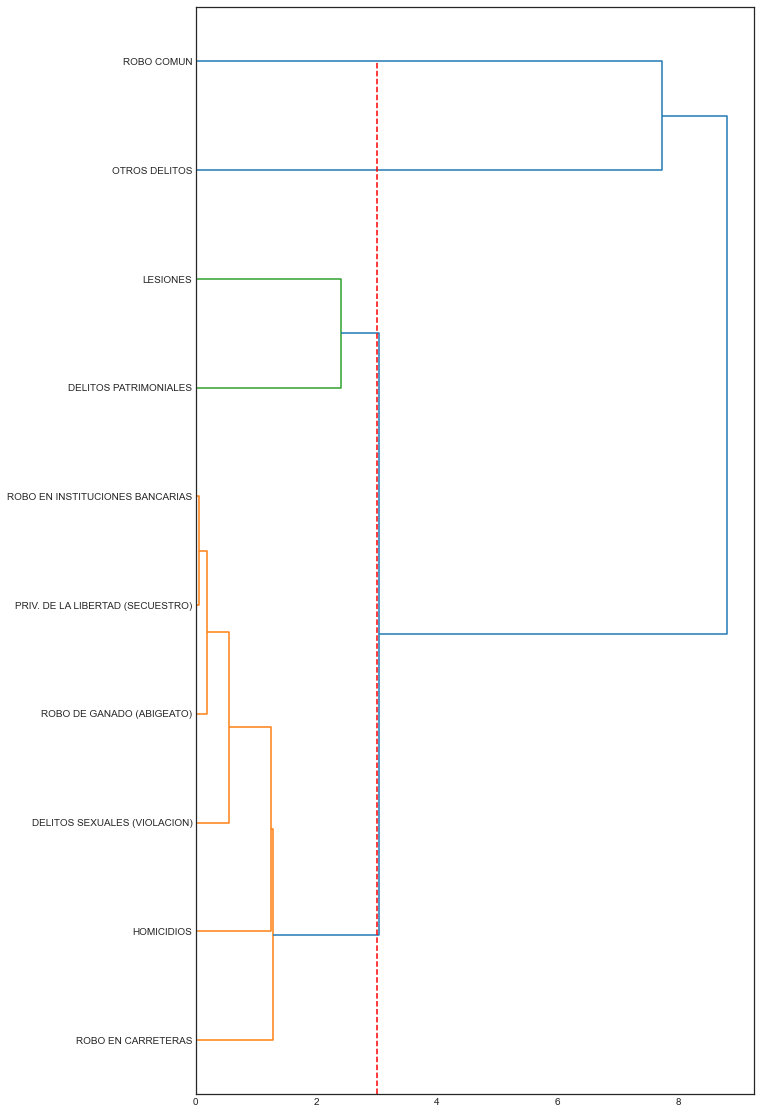

In [47]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.single(X),
                            labels=X.index, orientation='right', color_threshold=3, leaf_font_size=10)
#Traza la línea horizontal roja en el umbral de 5 (color_threshold)
plt.vlines(3,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');